<a href="https://colab.research.google.com/github/gsujal421/Apple-Music-EDA/blob/main/Apple_Music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving app_store_music_reviews.csv to app_store_music_reviews.csv


Importing essential libraries for data manipulation and visualization

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
df=pd.read_csv('app_store_music_reviews.csv',encoding='latin1')
df.head()

,app,country,title,review,rating,date
0,Spotify,MX,Muy buena aplicaciÃ³n de mÃºsica. Casi sin anu...,La,5,2025-05-21 18:57:56-07:00
1,SoundCloud,US,I have loved you from day 1 bi,"Nah fr tho, omm nothing but love for SoundClou...",5,2025-05-21 18:56:41-07:00
2,Spotify,MX,Los amo,Los amo,5,2025-05-21 18:56:12-07:00
3,Deezer,US,Must have a premium account to download music,I got this music app so I could download songs...,1,2025-05-21 18:50:34-07:00
4,Apple Music,US,4 star,I tunes donât have all the songs like to lis...,4,2025-05-21 18:50:04-07:00


 Checking the number of rows and columns in the dataset

In [3]:
df.shape

(5640, 6)

Displaying summary information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5640 entries, 0 to 5639
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   app      5640 non-null   object
 1   country  5640 non-null   object
 2   title    5640 non-null   object
 3   review   5640 non-null   object
 4   rating   5640 non-null   int64 
 5   date     5640 non-null   object
dtypes: int64(1), object(5)
memory usage: 264.5+ KB


Converting the 'date' column from string format to datetime format

In [5]:
df['date']=pd.to_datetime(df['date'])

Defining summary statistics to get a quick overview of numerical columns

In [6]:
df.describe()

,rating
count,5640.000000
mean,3.554433
std,1.664505
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


Checking for missing (null) values and duplicate rows in the dataset

In [7]:
print(df.isnull().sum())
print(df.duplicated().sum())

app        0
country    0
title      0
review     0
rating     0
date       0
dtype: int64
0


 Displaying the first few rows of the dataset to get an overview of its structure and contents

In [8]:
df.head()

,app,country,title,review,rating,date
0,Spotify,MX,Muy buena aplicaciÃ³n de mÃºsica. Casi sin anu...,La,5,2025-05-21 18:57:56-07:00
1,SoundCloud,US,I have loved you from day 1 bi,"Nah fr tho, omm nothing but love for SoundClou...",5,2025-05-21 18:56:41-07:00
2,Spotify,MX,Los amo,Los amo,5,2025-05-21 18:56:12-07:00
3,Deezer,US,Must have a premium account to download music,I got this music app so I could download songs...,1,2025-05-21 18:50:34-07:00
4,Apple Music,US,4 star,I tunes donât have all the songs like to lis...,4,2025-05-21 18:50:04-07:00


Percentage Distribution of Ratings

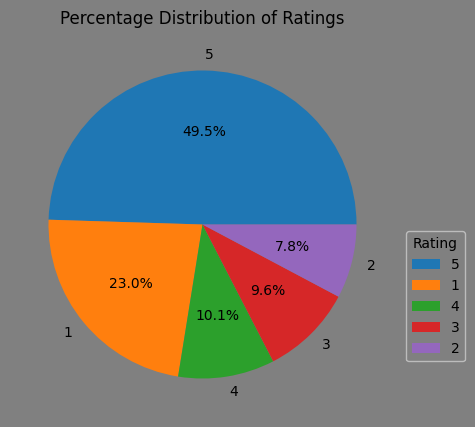

In [9]:
rating_counts = df['rating'].value_counts()

plt.figure(figsize=(10,5),facecolor='Grey')
plt.pie(rating_counts,labels=rating_counts.index, autopct='%1.1f%%')
plt.title('Percentage Distribution of Ratings')
plt.legend(title='Rating', loc='upper right', fontsize= 10,bbox_to_anchor=(1.2, 0.5),facecolor='grey')
plt.show()

 Average Rating Over Time (Yearly)

/tmp/ipython-input-12-3063764239.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly=df_indexed.resample('Y').mean(numeric_only=True)


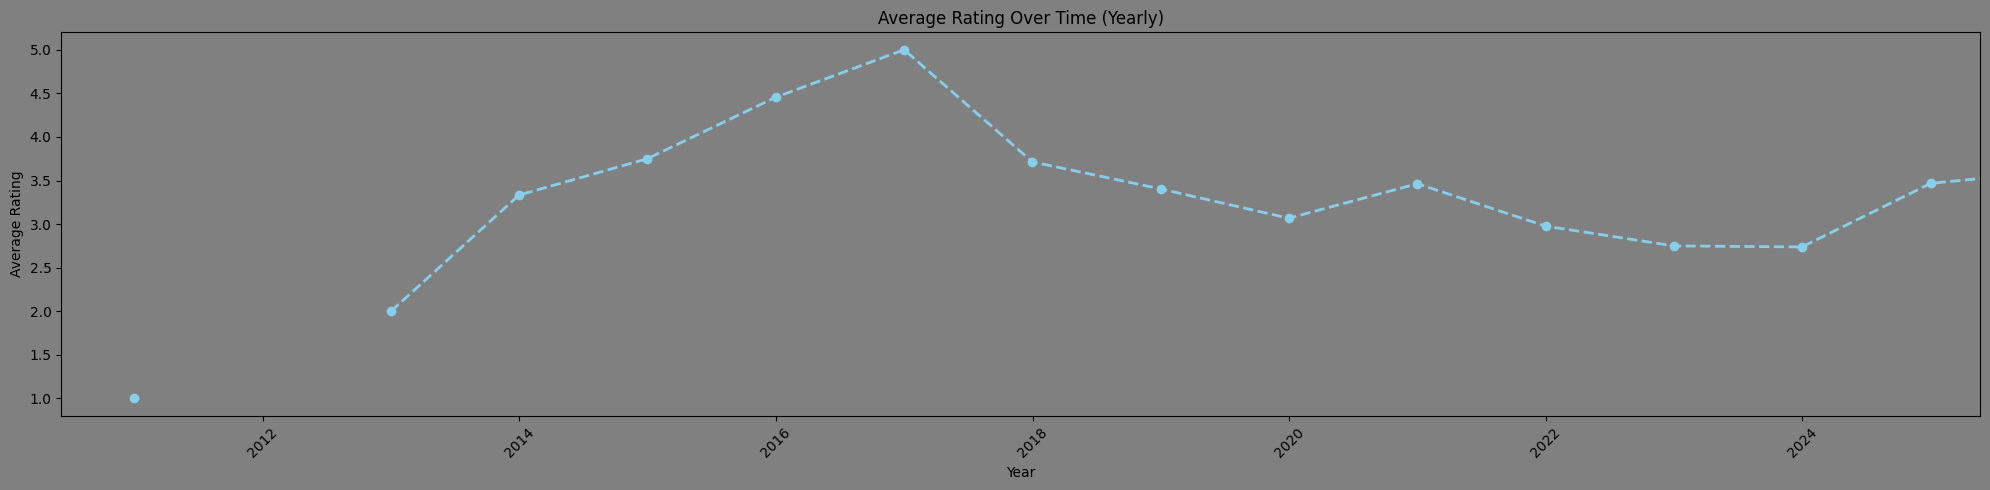

In [12]:
import datetime

df_indexed=df.set_index('date')
df_yearly=df_indexed.resample('Y').mean(numeric_only=True)

plt.figure(figsize=(20, 5), facecolor='grey')
plt.plot(df_yearly.index, df_yearly['rating'], linewidth=2, marker='o', color='skyblue',linestyle='--')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating Over Time (Yearly)')
plt.xticks(rotation=45)
plt.grid(color='grey')
plt.gca().set_facecolor('grey')
plt.xlim(datetime.datetime(2010, 6, 7), datetime.datetime(2025, 5, 21))
plt.tight_layout()
plt.show()

Average Rating Per App

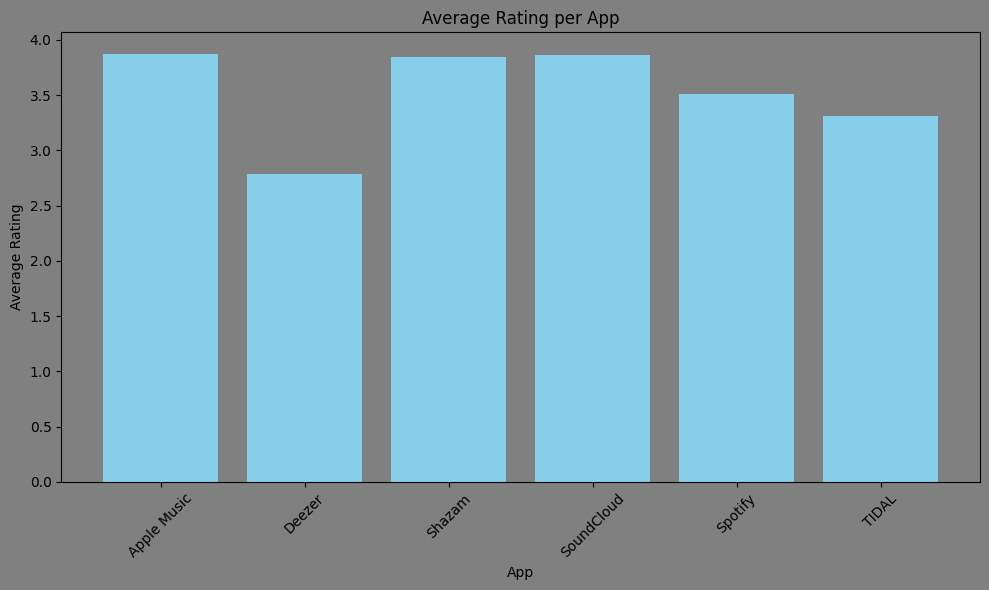

In [13]:
df_average_rating= df.groupby('app')['rating'].mean(numeric_only=True)

plt.figure(figsize=(10, 6),facecolor='grey')
plt.bar(df_average_rating.index,df_average_rating.values,color="skyblue")
plt.xlabel('App')
plt.ylabel('Average Rating')
plt.title('Average Rating per App')
plt.xticks(rotation=45)
plt.gca().set_facecolor('grey')
plt.tight_layout()
plt.show()

Distribution of Ratings

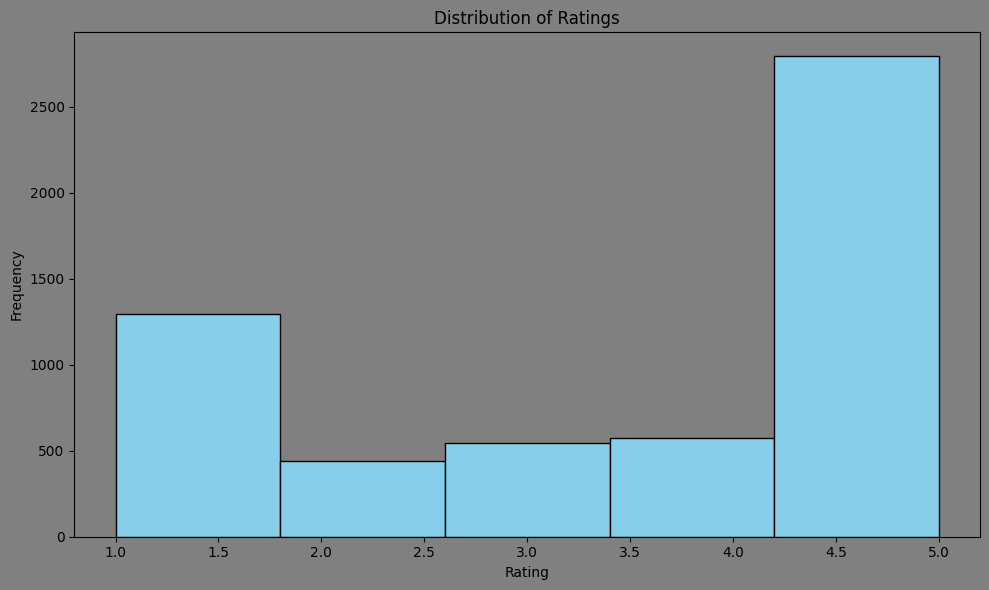

In [14]:
plt.figure(figsize=(10, 6),facecolor='grey')
plt.hist(df['rating'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.gca().set_facecolor('grey')
plt.tight_layout()
plt.show()

 Review Count Over Time (Yearly)



/tmp/ipython-input-15-1249901994.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_reviews_yearly= df_indexed.resample('Y').count()['review']


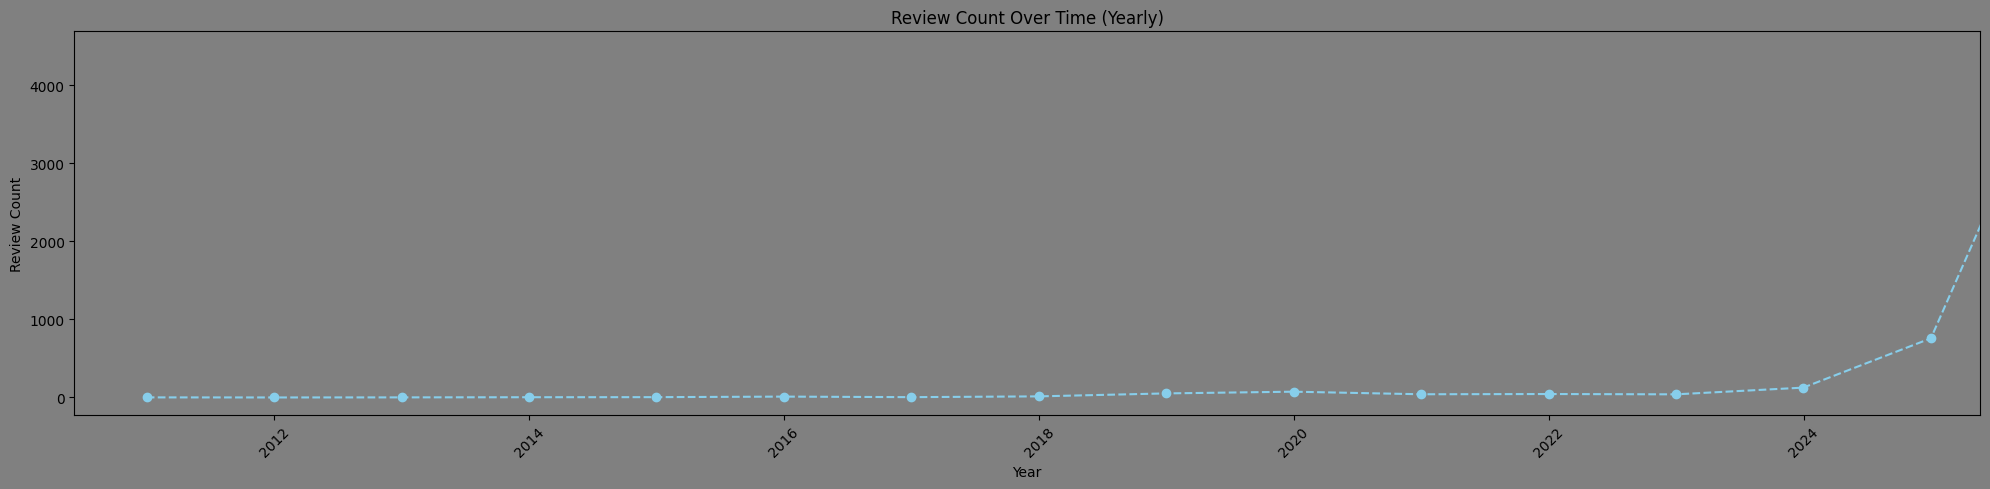

In [15]:
df_reviews_yearly= df_indexed.resample('Y').count()['review']

plt.figure(figsize=(20, 5), facecolor='grey')
plt.plot(df_reviews_yearly.index, df_reviews_yearly, color='skyblue', marker='o', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Review Count')
plt.title('Review Count Over Time (Yearly)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.gca().set_facecolor('grey')
plt.xlim(datetime.datetime(2010, 6, 7), datetime.datetime(2025, 5, 21))
plt.tight_layout()
plt.show()

In [16]:
df.head()

,app,country,title,review,rating,date
0,Spotify,MX,Muy buena aplicaciÃ³n de mÃºsica. Casi sin anu...,La,5,2025-05-21 18:57:56-07:00
1,SoundCloud,US,I have loved you from day 1 bi,"Nah fr tho, omm nothing but love for SoundClou...",5,2025-05-21 18:56:41-07:00
2,Spotify,MX,Los amo,Los amo,5,2025-05-21 18:56:12-07:00
3,Deezer,US,Must have a premium account to download music,I got this music app so I could download songs...,1,2025-05-21 18:50:34-07:00
4,Apple Music,US,4 star,I tunes donât have all the songs like to lis...,4,2025-05-21 18:50:04-07:00


Grouping the data by app and counting the number of occurrences

In [36]:
df_user= df.groupby('app').size().reset_index(name='user_count')
df_user.head()

,app,user_count
0,Apple Music,1000
1,Deezer,890
2,Shazam,1000
3,SoundCloud,1000
4,Spotify,950


User Count per App



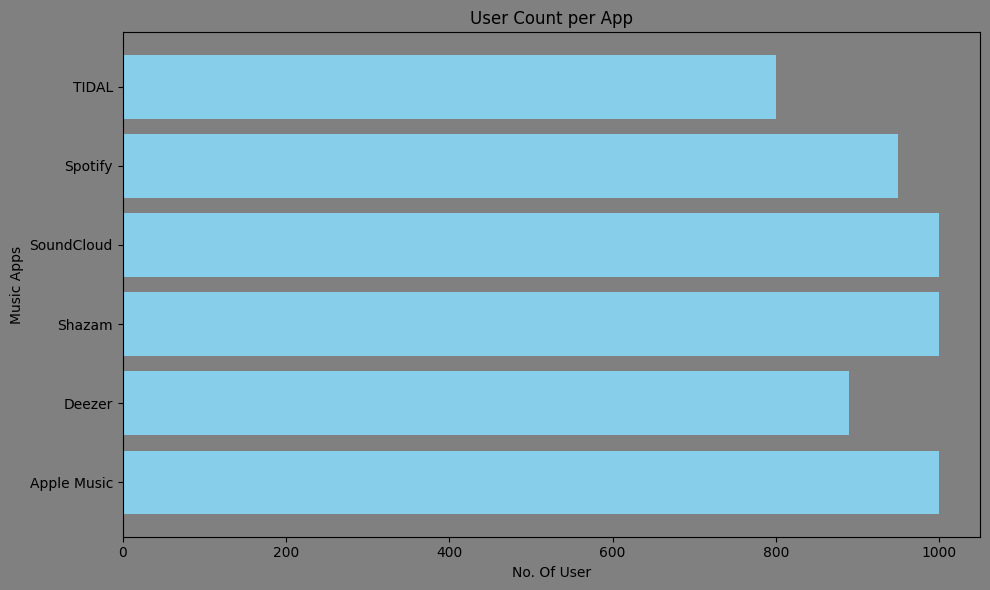

In [39]:
plt.figure(figsize=(10, 6),facecolor='grey')
plt.barh(df_user['app'], df_user['user_count'], color='skyblue')
plt.xlabel('No. Of User')
plt.ylabel('Music Apps')
plt.title('User Count per App')
plt.gca().set_facecolor('grey')
plt.tight_layout()
plt.show()